In [129]:
import torch 
from torch import nn
from matplotlib import pyplot as plt

class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel,self).__init__()
        self.weights = nn.Parameter(torch.rand(1,dtype=torch.float),
                                    requires_grad=True)
        self.bias = nn.Parameter(torch.rand(1,dtype=torch.float),
                                    requires_grad=True)# requires_grad => update using gradient descent 
    def forward(self,x : torch.Tensor) -> torch.Tensor:
        # y = weights *x + bias 
        return self.weights * x + self.bias 
    

In [130]:
weight = 0.7
bias = 0.3
X = torch.arange(0,1,0.02)

y = weight * X + bias


X.shape , y.shape
X[:5] , y[:5]
# split the data into training and testing [80 % training] [ 20 % testing]
train_split = int(0.8*len(X))

X_train , X_test = X[:train_split] , X[train_split:]
y_train , y_test = y[:train_split] , y[train_split:]

len(X_train) , len(X_test) , len(y_train) , len(y_test)

(40, 10, 40, 10)

In [131]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    '''
    Plot predictions is a function to plot data and if you have a prediction you can compare it to the original data 
    '''
    plt.figure(figsize=(10,7))
    #plot the training data
    plt.scatter(train_data, train_labels,c='b',s=4,label='Training data')
    #plot the testing data
    plt.scatter(test_data,test_labels,c='g',s=4,label='Testing data')

    # if i have a prediction
    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',s=4,label='Predictions')

    # show the legend 
    plt.legend(prop={"size":14})

In [132]:
# Check the content of this model 
torch.manual_seed(42)

model_0 = LinearModel()

In [133]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [134]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [135]:
# Making a prediction 
with torch.inference_mode():
    y_preds = model_0(X_test)

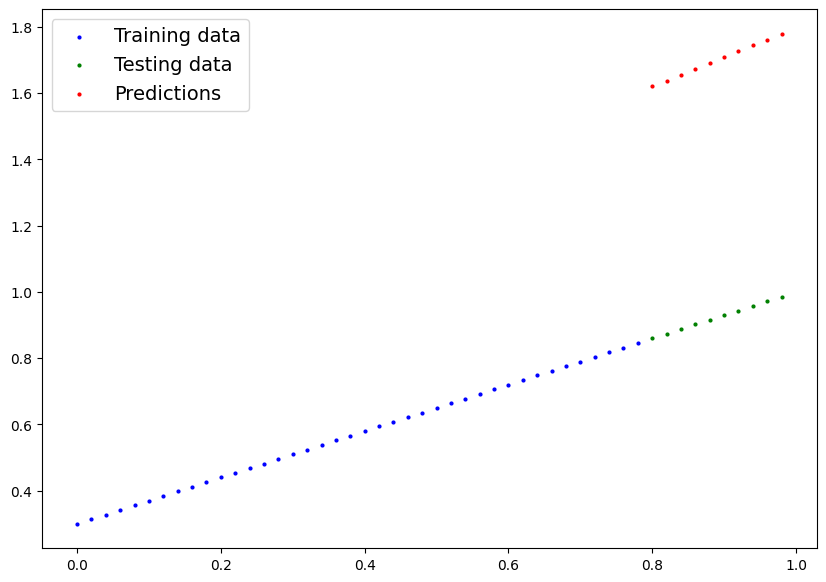

In [136]:
plot_predictions(predictions=y_preds)

In [137]:
lossfunc = nn.L1Loss()
optimizers = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [138]:
torch.manual_seed(42)

epochs = 100
train_value_loss = []
test_value_loss = []
epochs_count = []

for epoch in range(epochs):
    model_0.train()

    y_preds = model_0(X_train)

    loss = lossfunc(y_preds,y_train)

    optimizers.zero_grad()

    loss.backward()

    optimizers.step()

    model_0.eval()

    with torch.inference_mode() :
        test_pred =  model_0(X_test)
        test_loss = lossfunc(test_pred,y_test)

    if epoch % 10 == 0:
        epochs_count.append(epoch)
        train_value_loss.append(loss.detach().numpy())
        test_value_loss.append(loss.detach().numpy())
        print(f"Epoch : {epoch} | MAE Train Loss : {loss} | MAE Test Loss {test_loss}")



Epoch : 0 | MAE Train Loss : 0.6860889196395874 | MAE Test Loss 0.7637526988983154
Epoch : 10 | MAE Train Loss : 0.5708791017532349 | MAE Test Loss 0.6290428042411804
Epoch : 20 | MAE Train Loss : 0.45566922426223755 | MAE Test Loss 0.4943329691886902
Epoch : 30 | MAE Train Loss : 0.34045934677124023 | MAE Test Loss 0.35962313413619995
Epoch : 40 | MAE Train Loss : 0.2252494841814041 | MAE Test Loss 0.2249133139848709
Epoch : 50 | MAE Train Loss : 0.1100396141409874 | MAE Test Loss 0.09020347893238068
Epoch : 60 | MAE Train Loss : 0.009724985808134079 | MAE Test Loss 0.020998019725084305
Epoch : 70 | MAE Train Loss : 0.006216754671186209 | MAE Test Loss 0.014099234715104103
Epoch : 80 | MAE Train Loss : 0.002788322512060404 | MAE Test Loss 0.005826681852340698
Epoch : 90 | MAE Train Loss : 0.007095950655639172 | MAE Test Loss 0.00754010071977973


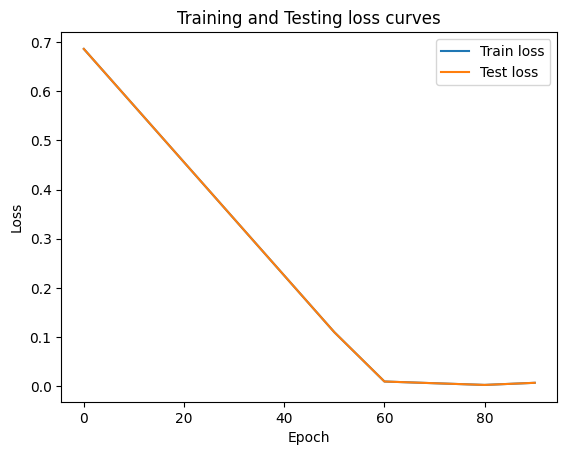

In [139]:
plt.plot(epochs_count,train_value_loss,label = "Train loss")
plt.plot(epochs_count,test_value_loss,label = "Test loss")
plt.title("Training and Testing loss curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [140]:
model_0.eval()
with torch.inference_mode():
    y_pred_train = model_0(X_test)

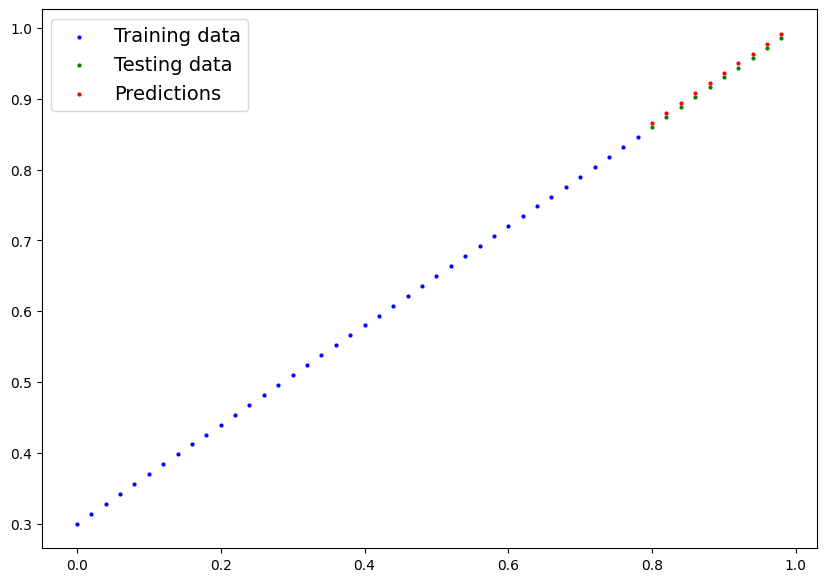

In [141]:
plot_predictions(predictions=y_pred_train)